In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [ ]:
for i in os.walk(train_dir):
  print(i)
  break

('cats_and_dogs/train', ['cats', 'dogs'], ['.DS_Store'])


In [ ]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [ ]:
total_train, total_val, total_test

(2001, 1001, 51)

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
os.listdir('cats_and_dogs')

['test', '.DS_Store', 'train', 'validation']

In [ ]:
train_image_generator = ImageDataGenerator(rescale= 1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory = train_dir + '/',
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = 'binary',
    seed = 42
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir + '/',
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = 'binary',
    seed = 42
)

test_data_gen = test_image_generator.flow_from_directory(
    directory = PATH,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = 1,
    classes = ['test'],
    class_mode = None,
    shuffle = False,
    seed = 42
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


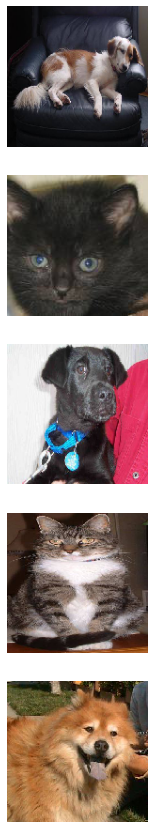

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    zoom_range = 0.3,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.3
)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
    directory = train_dir,
    batch_size = batch_size,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary',
    seed = 42
)

Found 2000 images belonging to 2 classes.


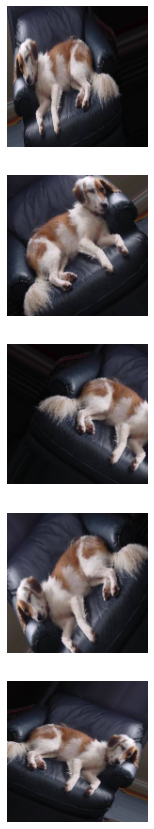

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(54, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))

In [ ]:
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 54)        62262     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 54)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        31168     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_data_gen, epochs=epochs, validation_data= val_data_gen, validation_steps=val_data_gen.n // val_data_gen.batch_size, steps_per_epoch=train_data_gen.n // train_data_gen.batch_size)

Epoch 1/15
15/15 [==============================] - 24s 1s/step - loss: 0.6975 - accuracy: 0.4893 - val_loss: 0.6953 - val_accuracy: 0.4933
Epoch 2/15
15/15 [==============================] - 22s 1s/step - loss: 0.6938 - accuracy: 0.4891 - val_loss: 0.6943 - val_accuracy: 0.4900
Epoch 3/15
15/15 [==============================] - 20s 1s/step - loss: 0.6938 - accuracy: 0.4991 - val_loss: 0.6927 - val_accuracy: 0.5301
Epoch 4/15
15/15 [==============================] - 20s 1s/step - loss: 0.6929 - accuracy: 0.5129 - val_loss: 0.6915 - val_accuracy: 0.5056
Epoch 5/15
15/15 [==============================] - 20s 1s/step - loss: 0.6923 - accuracy: 0.5113 - val_loss: 0.6902 - val_accuracy: 0.5312
Epoch 6/15
15/15 [==============================] - 20s 1s/step - loss: 0.6927 - accuracy: 0.5058 - val_loss: 0.6883 - val_accuracy: 0.5625
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.6867 - accuracy: 0.5594 - val_loss: 0.6654 - val_accuracy: 0.6272
Epoch 8/15
15/15 [==

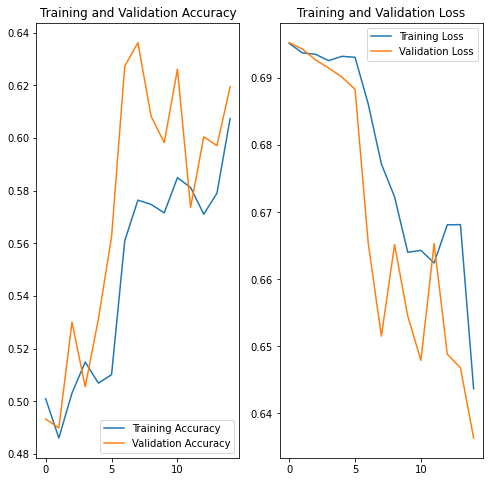

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
samples = next(test_data_gen)
probabilities = model.predict(test_data_gen)
probabilities = probabilities.argmax(axis=-1)

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.66% of the images of cats and dogs.
You passed the challenge!
